# Main working file

In [4]:
# imports

## system
import glob
import os
import numpy as np
import pandas as pd


import util.feature_extraction as fe
import util.feature_selection as fs
import util.correlation_measure as cm
import util.video_transformation as vt

from scipy.stats import pearsonr


LOCATION = "data"
ACTION_UNITS = "au"
FEATURE_FOLDER = "features"
CORRELATION_FOLDER = 'correlations'
PHASES = [f'{name}_{i}' for name, num in  [("instructional_video", 1), ("discussion_phase", 2), ("reschu_run", 8)] for i in range(num)]
SETS = ['corrca', 'factors']

for pair in os.listdir(LOCATION):
    filename = os.path.join(LOCATION, pair, FEATURE_FOLDER)
    os.makedirs(filename, exist_ok=True)
    filename = os.path.join(LOCATION, pair, CORRELATION_FOLDER)
    os.makedirs(filename, exist_ok=True)


# Preprocessing

## Rewrapping

In [5]:
# # Import the function
# from util.video_transformation import rewrap_video

# %load_ext autoreload
# %autoreload 2 

# base_path = "data-in"
# input_folder = "avi"

# for team_folder in os.listdir(base_path):
#     if team_folder not in ['09_10', '21_22']:
#         continue
#     path_videos = os.path.join(base_path, team_folder, input_folder, "*.avi")
#     files = glob.glob(path_videos)

#     for file in files:
#         rewrap_video(file, os.path.join(base_path, team_folder))

## Merge audio and video

In [6]:
# from util.video_transformation import merge_audio_video

# video_path = r'C:\Users\bruinj\OneDrive - TNO\Project Pages\Team Metrics\Team\Work\Experiment\data\21_22\analysis\pp21_navigator_reconstructed_video_2.avi'
# audio_path = r'C:\Users\bruinj\OneDrive - TNO\Project Pages\Team Metrics\Team\Work\Experiment\data\21_22\analysis\navigator_21_discussion_phase_1_audio.wav'
# output_path = r'C:\Users\bruinj\OneDrive - TNO\Project Pages\Team Metrics\Team\Work\Experiment\data\21_22\analysis\navigator_21_discussion_phase_1_audio_vid.avi'

# merge_audio_video()

# Extraction of Action Units (AUs)

In [7]:
# ### all in one doc:
# import util.feature_extraction as fe
# import os

# openface_path = r"C:\Users\Erik\Documents\facial-expression-synchrony\OpenFace_2.2.0_win_x64\OpenFace_2.2.0_win_x64\OpenFace_2.2.0_win_x64\FeatureExtraction.exe"
  
# data_in = r"data"
# data_out = r"data-out"
# folder = "au"
# phases = [("instructional_video", 1), ("discussion_phase", 2), ("reschu_run", 8)]
# for i in range(5,100)[::2]:
#     j = i + 1
#     if i < 10: i = "0" + str(i)
#     if j < 10: j = "0" + str(j)
#     pair = f"{i}_{j}"
#     print(pair)
#     for phase, count in phases:
#         for c in range(count):
#             nav = f"pp{i}_navigator_{phase}_{c}"
#             pil = f"pp{j}_pilot_{phase}_{c}"
#             for participant in [nav, pil]:
#                 input = os.path.join(data_in, participant + "_reconstructed_video.avi")
#                 output = os.path.join(data_out, pair, folder, participant + ".csv")
#                 if os.path.exists(input):
#                     if os.path.exists(output):
#                         print(f"{participant} already processed, skipping")
#                         continue
#                     else:
#                         print(f"{participant} extraction")
#                         os.system(f"{openface_path} -f \"{input}\" -aus -of \"{output}\"")
#                 else:
#                     print(f"{participant} avi file does not exist in the input folder")


In [8]:
### FOLLOWING OLD STRUCTURE
# from util.feature_extraction import extract_features
# data_in = r'data-in'
# data_out = r'data-out'

# for pair in os.listdir(data_in):
#     if pair == "21_22":
#         continue
#     input_folder = os.path.join(data_in, pair)
#     output_folder = os.path.join(data_out, pair, 'au')
#     for participant in pair.split('_'):
#         # TODO: handle missing data (NaN or recovered)
#         if os.path.exists(input_folder):
#             aus = extract_features(input_folder, participant, output_folder)


# Feature selection


## Facial factors

In [9]:
## EXTRACTING FACIAL FACTORS FOR EACH FILE SEPARATELY
for pair in os.listdir(LOCATION):
    for file in os.listdir(os.path.join(LOCATION, pair, ACTION_UNITS)):
        if ".csv" in file: 
            filename = os.path.join(LOCATION, pair, ACTION_UNITS, file)
            participant, _ = file.split("_",1)
            df = pd.read_csv(filename)
            for name in PHASES:
                if name in file:
                    factors = fs.au_to_factors(df)
                    factors.to_csv(os.path.join(LOCATION, pair, FEATURE_FOLDER, f"{participant}_{name}_factors.csv"), index=False)

KeyboardInterrupt: 

## Correlated Component Analysis

In [ ]:
## CREATING WEIGHTS FOR EACH PAIR SEPARATELY

# corrCA takes a df as input. This df should be all files for a pair. 
for pair in os.listdir(LOCATION):
    filename = os.path.join(LOCATION, pair)
    data = {}
    nav, pil = pair.split("_")
    nav_df = pd.DataFrame()
    pil_df = pd.DataFrame()
    # add all phases to a single dataframe
    for file in os.listdir(os.path.join(filename, ACTION_UNITS)):
        if ".csv" in file: 
            df = pd.read_csv(os.path.join(filename, ACTION_UNITS, file))
            if ".csv" in file and nav in file:
                nav_df = pd.concat([nav_df, df])
            if ".csv" in file and pil in file:
                pil_df = pd.concat([pil_df, df])
    nav_df, pil_df = fs.make_equal_length(pair, nav_df, pil_df)
    w = fs.corrCA_weights(nav_df, pil_df) #output = pair/pair_corrca_weights.csv
    w.to_csv(os.path.join(filename, f"{pair}_corrca_weights.csv"), index=False)


files of pairs in 05_06 do not have the same amount of datapoints - temporary fix has made them equal length
(17, 17)
files of pairs in 07_08 do not have the same amount of datapoints - temporary fix has made them equal length
(17, 17)
files of pairs in 09_10 do not have the same amount of datapoints - temporary fix has made them equal length
(17, 17)
files of pairs in 11_12 do not have the same amount of datapoints - temporary fix has made them equal length
(17, 17)
files of pairs in 13_14 do not have the same amount of datapoints - temporary fix has made them equal length
(17, 17)
files of pairs in 17_18 do not have the same amount of datapoints - temporary fix has made them equal length
(17, 17)
files of pairs in 19_20 do not have the same amount of datapoints - temporary fix has made them equal length
(17, 17)
files of pairs in 25_26 do not have the same amount of datapoints - temporary fix has made them equal length
(17, 17)
files of pairs in 27_28 do not have the same amount of d

In [ ]:
## APPLYING CORRCA WEIGHTS TO EACH FILE SEPARATELY

for pair in os.listdir(LOCATION):
    loc = os.path.join(LOCATION, pair, f'{pair}_corrca_weights.csv')
    if not os.path.exists(loc):
        break
    w = pd.read_csv(os.path.join(LOCATION, pair, f'{pair}_corrca_weights.csv'))
    for file in os.listdir(os.path.join(LOCATION, pair, ACTION_UNITS)):
        if ".csv" in file: 
            filename = os.path.join(LOCATION, pair, ACTION_UNITS, file)
            participant, _ = file.split("_", 1)
            df = pd.read_csv(filename)
            for name in PHASES:
                if name in file:
                    corrca = fs.apply_corrCA_weights(df, w)
                    corrca.to_csv(os.path.join(LOCATION, pair, FEATURE_FOLDER, f"{participant}_{name}_corrca.csv"), index=False)
                    continue


# Correlation measure

In [ ]:
# # make the factors and corrca components binary 
# # scale them to -1, 1

# df = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\05_06\selection\pp05_discussion_phase_0_factors.csv")
# df = df.drop(columns=['frame'])

# print(df.values[:3])


# df = cm.binarize_components(df.values)
# print(df[:3])


## Pearson


In [ ]:
# extract pearson correlation for each file for both facial factors and corrca features
for pair in os.listdir(LOCATION):
    df = pd.DataFrame()
    nav, pil = pair.split("_")
    file = os.path.join(LOCATION, pair, FEATURE_FOLDER)

    for phase in PHASES:
        correlation = []

        for condition in SETS:
            # do not process if it does not exists
            nav_file = os.path.join(os.path.join(file, f"pp{nav}_{phase}_{condition}.csv"))
            pil_file = os.path.join(os.path.join(file, f"pp{pil}_{phase}_{condition}.csv"))
            if not os.path.exists(nav_file) or not os.path.exists(pil_file):
                print(f"{pair}_{phase}_{condition} misses files, skipping entire {phase} for {pair}")
                break

            # process
            nav_df = pd.read_csv(nav_file)
            pil_df = pd.read_csv(pil_file)
            nav_df, pil_df = fs.make_equal_length(f"{pair}_{phase}", nav_df, pil_df)
            for i in range(1,nav_df.shape[1]):
                corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
                correlation.append(corr)
        if correlation: 
            df[phase] = correlation

    # for participant-wise saving
    df.to_csv(os.path.join(LOCATION, pair, CORRELATION_FOLDER, f"{pair}_pearson.csv"))
    
    # for easy access saving
    df.to_csv(os.path.join("results", f"{pair}_pearson.csv"))

# SETS = ['corrca', 'factors']
# PHASES = ['instructional_video_0', 'discussion_phase_0', 'discussion_phase_1']
# factors = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']

# # each pair gets a separate file
# for pair in os.listdir(LOCATION):
#     df = pd.DataFrame()
#     nav, pil = pair.split("_")
#     file = os.path.join(LOCATION, pair, CORRELATION_FOLDER)

#     # format:  | factor1 | factor2 | ... | factor 6 | corrca | (per phase)
#     for phase in PHASES:
#         correlation = []
#         # factors
#         nav_factors = pd.read_csv(os.path.join(file, f"pp{nav}_{phase}_factors.csv"))
#         pil_factors = pd.read_csv(os.path.join(file, f"pp{pil}_{phase}_factors.csv"))
#         nav_factors, pil_factors = fs.make_equal_length(f"{pair}_{phase}", nav_factors, pil_factors)
#         for f in factors:
#             corr, _ = pearsonr(nav_factors[f].values, pil_factors[f].values)
#             correlation.append(corr)

#         # corrca
#         nav_corrca = pd.read_csv(os.path.join(file, f"pp{nav}_{phase}_corrca.csv"))
#         pil_corrca = pd.read_csv(os.path.join(file, f"pp{pil}_{phase}_corrca.csv"))
#         nav_corrca, pil_corrca = fs.make_equal_length(f"{pair}_{phase}", nav_corrca, pil_corrca)
        
#         corr, _ = pearsonr(nav_corrca['component1'].values, pil_corrca['component1'].values)
#         correlation.append(corr)
        
#         df[phase] = correlation
    
#     # for participant-wise saving
#     df.to_csv(os.path.join(LOCATION, pair, "extraction", f"{pair}_pearson.csv"))
    
#     # for easy access saving
#     df.to_csv(os.path.join("results", f"{pair}_pearson.csv"))



files of pairs in 05_06_discussion_phase_0 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 05_06_discussion_phase_0 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 05_06_reschu_run_0 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 05_06_reschu_run_0 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 05_06_reschu_run_1 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 05_06_reschu_run_1 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 05_06_reschu_run_2 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 05_06_reschu_run_2 do not have the same amount of datapoints - temporary fix has made them equal length
files of pai

C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)


files of pairs in 13_14_reschu_run_0 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_0 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_1 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_1 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_2 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_2 do not have the same amount of datapoints - temporary fix has made them equal length


C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)


files of pairs in 13_14_reschu_run_3 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_3 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_4 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_4 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_5 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_5 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_6 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_reschu_run_6 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 13_14_

C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)


files of pairs in 17_18_discussion_phase_0 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_discussion_phase_1 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_discussion_phase_1 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_reschu_run_0 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_reschu_run_0 do not have the same amount of datapoints - temporary fix has made them equal length


C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)


files of pairs in 17_18_reschu_run_1 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_reschu_run_1 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_reschu_run_2 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_reschu_run_2 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_reschu_run_3 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_reschu_run_3 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_reschu_run_4 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_reschu_run_4 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 17_18_

C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)
C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarni

files of pairs in 29_30_reschu_run_0 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_1 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_1 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_2 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_2 do not have the same amount of datapoints - temporary fix has made them equal length


C:\Users\Erik\AppData\Local\Temp\ipykernel_2664\3125120916.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(nav_df[f'f{i}'].values, pil_df[f'f{i}'].values)


files of pairs in 29_30_reschu_run_3 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_3 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_4 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_4 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_5 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_5 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_6 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_reschu_run_6 do not have the same amount of datapoints - temporary fix has made them equal length
files of pairs in 29_30_

## cRQA

# EXPERIMENT AREA

c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytools\persistent_dict.py:52: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


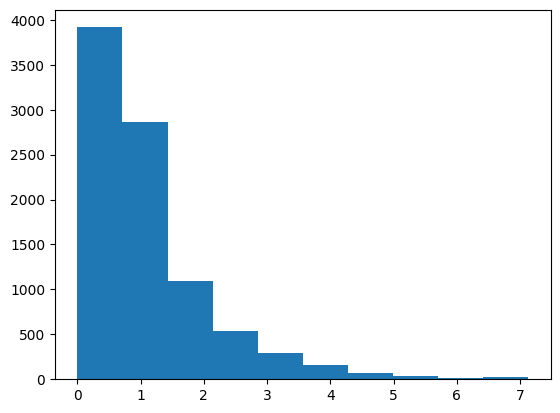

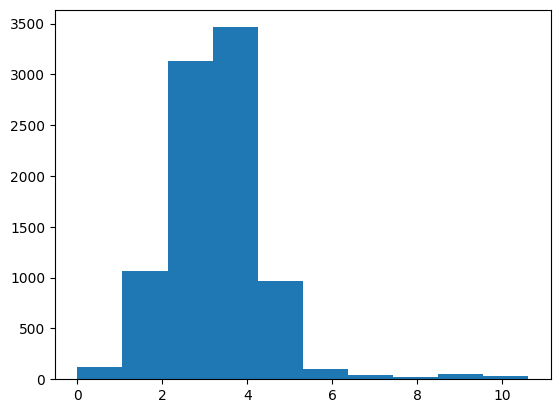

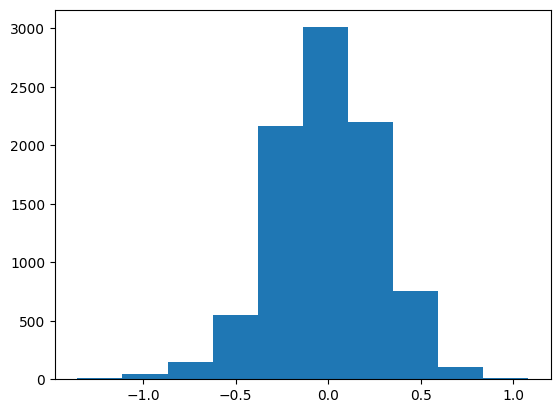

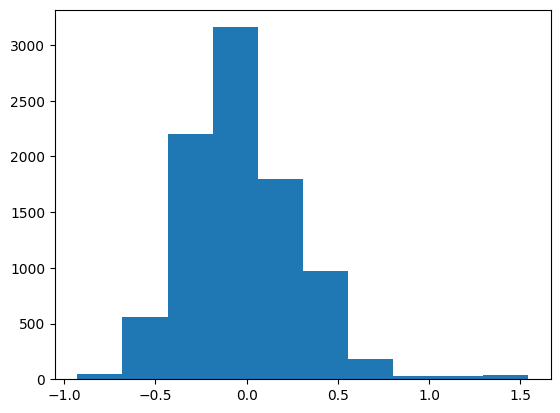

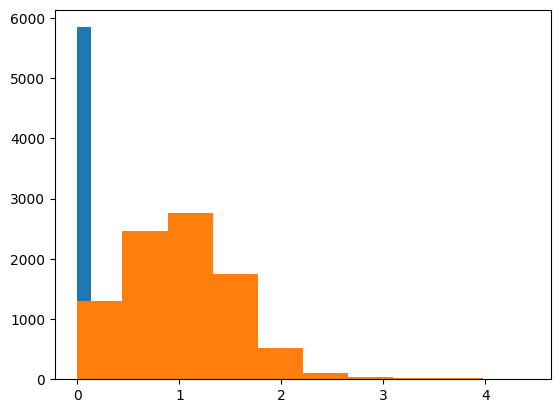

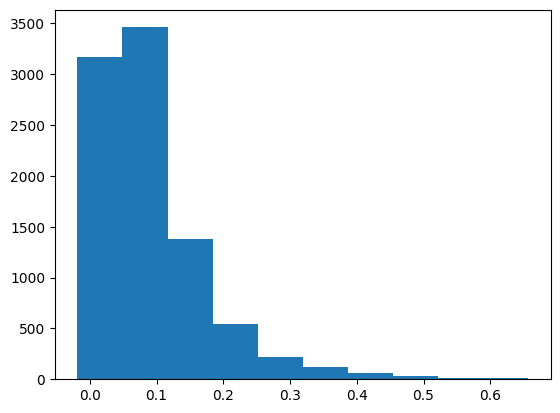

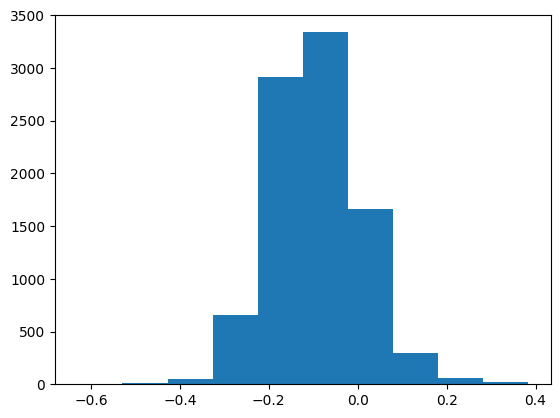

Recurrence rate: 1.0000
Determinism: 1.0000
Laminarity: 1.0000
Average diagonal line length: 4497.9998
Longest diagonal line length: 8994
Recurrence rate: 0.4131
Determinism: 0.9677
Laminarity: 0.9686
Average diagonal line length: 9.2962
Longest diagonal line length: 494
Recurrence rate: 0.3433
Determinism: 0.9571
Laminarity: 0.9601
Average diagonal line length: 8.8634
Longest diagonal line length: 368
Recurrence rate: 0.5122
Determinism: 0.9768
Laminarity: 0.9813
Average diagonal line length: 16.1458
Longest diagonal line length: 613
Recurrence rate: 0.0056
Determinism: 0.5358
Laminarity: 0.4452
Average diagonal line length: 2.6450
Longest diagonal line length: 20
0.1
0.1
Recurrence rate: 0.3244
Determinism: 0.9562
Laminarity: 0.9561
Average diagonal line length: 7.6713
Longest diagonal line length: 248
0.0
0.0
Recurrence rate: 1.0000
Determinism: 1.0000
Laminarity: 1.0000
Average diagonal line length: 4497.9998
Longest diagonal line length: 8994
0.25
0.25
Recurrence rate: 0.6084
Dete

In [ ]:
import pandas as pd
import util.feature_selection as fs
import util.correlation_measure as cm
import matplotlib.pyplot as plt


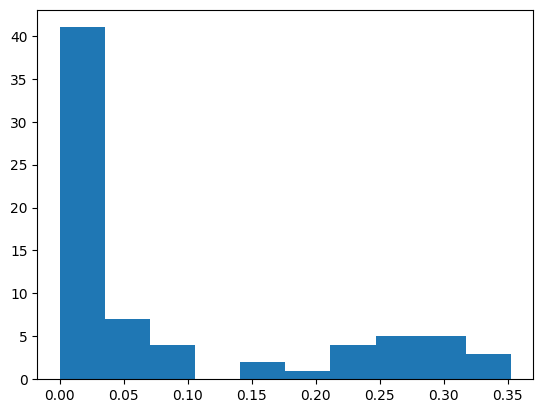

(array([ 15.,  18.,  15.,   6.,   0.,   3.,   9.,  12.,  12., 126.]),
 array([0.12726958, 0.21454262, 0.30181567, 0.38908871, 0.47636175,
        0.56363479, 0.65090783, 0.73818087, 0.82545391, 0.91272695,
        0.99999999]),
 <BarContainer object of 10 artists>)

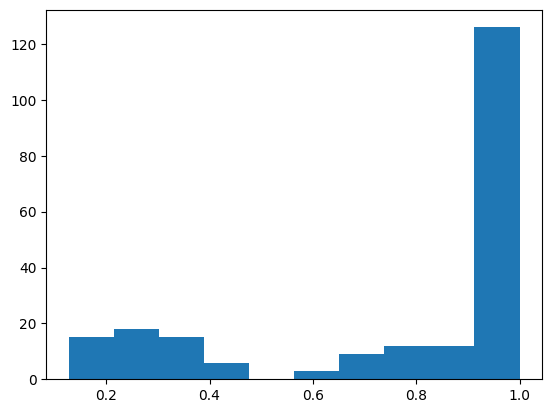

In [9]:
df = pd.read_csv("gridsearch_no_scaling.csv")
plt.hist(df['RR'])
plt.show()
df = pd.read_csv("gridsearch_absolute_threshold.csv")
plt.hist(df['RR'])

In [ ]:

# nav = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\07_08\selection\pp07_discussion_phase_0_factors.csv")
# pil = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\07_08\selection\pp08_discussion_phase_0_factors.csv")



# for f in factors:
#     cm.crqa(f, nav[f].values, pil[f].values) 


# nav = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\07_08\selection\pp07_discussion_phase_0_factors.csv")
# pil = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\07_08\selection\pp08_discussion_phase_0_factors.csv")

# cm.crqa3(nav.iloc[1:].values, pil.iloc[1:].values)


# nav = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\07_08\selection\pp07_discussion_phase_0_factors.csv")
# pil = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\07_08\selection\pp08_discussion_phase_0_factors.csv")

# cm.mimicry(nav.iloc[1:].values, pil.iloc[1:].values)

In [ ]:
import pandas as pd
import util.correlation_measure as cm
nav = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\07_08\selection\pp07_discussion_phase_0_factors.csv")
pil = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\07_08\selection\pp08_discussion_phase_0_factors.csv")
nav = nav.drop(columns=["frame"])
pil = pil.drop(columns=["frame"])
nav = cm.binarize_components(nav.values)
pil = cm.binarize_components(pil.values)

cm.crqa2("bin_factors",nav, pil)

nav = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\07_08\selection\pp07_discussion_phase_0_corrca.csv")
pil = pd.read_csv(r"C:\Users\Erik\Documents\facial-expression-synchrony\data-out\07_08\selection\pp08_discussion_phase_0_corrca.csv")
nav = nav.drop(columns=["frame"])
pil = pil.drop(columns=["frame"])
nav = cm.binarize_components(nav.values)
pil = cm.binarize_components(pil.values)

cm.crqa2("bin_corrca",nav, pil)

Recurrence rate: 0.3497
Determinism: 0.7576
Laminarity: 0.3193
Average diagonal line length: 3.0239
Longest diagonal line length: 353
Recurrence rate: 0.5056
Determinism: 0.5643
Laminarity: 0.7805
Average diagonal line length: 72.5376
Longest diagonal line length: 1028


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PHASES = ["05_06", "07_08", "09_10", "11_12", "13_14"]
for p in PHASES:
    df = pd.read_csv(f"C:\\Users\\Erik\\Documents\\facial-expression-synchrony\\data-out\\{p}\\{p}_corrca_weights.csv")
    w = df['w']
    isc = df['isc'].values  # Get values as a NumPy array

    isc = [np.abs(i) for i in isc]  # Take absolute values
    isc_sorted = sorted(isc, reverse=True)  # Sort in descending order (returns new list)

    tot = np.sum(isc)
    tmp = 0
    for index, i in enumerate(isc):
        tmp = tmp + i
        if tmp/tot > 0.75:
            print(index)
            break

    plt.plot(isc_sorted, label=p)

plt.legend()
plt.xlabel('Index')
plt.ylabel('ISC Value (Absolute)')
plt.title('Reverse Sorted Absolute ISC Values')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

PHASES = ["05_06", "07_08", "09_10", "11_12", "13_14"]
for p in PHASES:    
    df = pd.read_csv(f"C:\\Users\\Erik\\Documents\\facial-expression-synchrony\\data-out\\{p}\\{p}_corrca_weights.csv")
    isc = np.abs(df['isc'].values)  # Take absolute values and convert to NumPy array
    isc_sorted = np.sort(isc)[::-1]  # Sort in descending order

    # Compute cumulative contribution (optional)
    cumulative_isc = np.cumsum(isc_sorted) / np.sum(isc_sorted)  # Normalized cumulative sum

    # Create scree plot
    plt.figure(figsize=(10, 6))

    # Plot individual ISC values (bars or line)
    plt.plot(isc_sorted, 'b-', linewidth=2, label='Absolute ISC')
    plt.scatter(range(len(isc_sorted)), isc_sorted, color='red', s=20)  # Optional: dots for each value

    # Optional: Add cumulative contribution (dashed line)
    plt.plot(cumulative_isc * max(isc_sorted), 'g--', linewidth=1, label='Cumulative (scaled)')

    # Customize plot
    plt.xlabel('Component Rank (Sorted Descending)', fontsize=12)
    plt.ylabel('Absolute ISC Weight', fontsize=12)
    plt.title('Scree Plot of ISC Weights', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [ ]:
# general corrca
data = {}
nav, pil = pair.split("_")
nav_df = pd.DataFrame()
pil_df = pd.DataFrame()

for pair in os.listdir(LOCATION):
    print(pair)
    filename = os.path.join(LOCATION, pair)
    for file in os.listdir(os.path.join(filename, "au")):
        if ".csv" in file: 
            df = pd.read_csv(os.path.join(filename, "au", file))
            if ".csv" in file and nav in file:
                nav_df = pd.concat([nav_df, df])
            if ".csv" in file and pil in file:
                pil_df = pd.concat([pil_df, df])
nav_df, pil_df = fs.make_equal_length(pair, nav_df, pil_df)
w = fs.corrCA_weights(nav_df, pil_df) #output = pair/pair_corrca_weights.csv
w.to_csv(r"data-out/general_corrca_weights.csv", index=False)


In [ ]:
import os
import pandas as pd
import util.feature_extraction as fe
import util.feature_selection as fs
# corrCA takes a df as input. This df should be all files for a pair. 
LOCATION = 'data-out'

pair = "05_06"
filename = os.path.join(LOCATION, pair)
data = {}
nav, pil = pair.split("_")
nav_df = pd.DataFrame()
pil_df = pd.DataFrame()
# add all phases to a single dataframe
for file in os.listdir(os.path.join(filename, "")):
    if ".csv" in file: 
        df = pd.read_csv(os.path.join(filename, "au", file))
        if ".csv" in file and nav in file:
            nav_df = pd.concat([nav_df, df])
        if ".csv" in file and pil in file:
            pil_df = pd.concat([pil_df, df])
nav_df, pil_df = fs.make_equal_length(pair, nav_df, pil_df)
w = fs.corrCA_weights(nav_df, pil_df) #output = pair/pair_corrca_weights.csv
w.to_csv(os.path.join(filename, f"{pair}_corrca_weights.csv"), index=False)

LOCATION = 'data-out'
PHASES = ['discussion_phase_0', 'discussion_phase_1', 'instructional_video_0']
loc = os.path.join(LOCATION, pair, f'{pair}_corrca_weights.csv')
w = pd.read_csv(os.path.join(LOCATION, pair, f'{pair}_corrca_weights.csv'))
for file in os.listdir(os.path.join(LOCATION, pair, "au")):
    if ".csv" in file: 
        filename = os.path.join(LOCATION, pair, "au", file)
        participant, _ = file.split("_", 1)
        df = pd.read_csv(filename)
        for name in PHASES:
            if name in file:
                corrca = fs.apply_corrCA_weights(df, w, 3)
                corrca.to_csv(os.path.join(LOCATION, pair, "features", f"{participant}_{name}_corrca.csv"), index=False)
                continue



FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data-out\\05_06\\au'